In [1]:
!pip install google finance
!pip install scikit-learn
!pip install tensorFlow
!pip install lazypredict

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import lazypredict
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor


In [3]:
start = '2012-01-01'
end = '2024-02-29'
stock = 'TSLA'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
data.reset_index(inplace=True)

In [5]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,1.93,1.97,1.84,1.87,1.87,13921500
1,2012-01-04,1.88,1.91,1.83,1.85,1.85,9451500
2,2012-01-05,1.85,1.86,1.79,1.81,1.81,15082500
3,2012-01-06,1.81,1.85,1.76,1.79,1.79,14794500
4,2012-01-09,1.80,1.83,1.74,1.82,1.82,13455000
...,...,...,...,...,...,...,...
3053,2024-02-22,194.00,198.32,191.36,197.41,197.41,92739500
3054,2024-02-23,195.31,197.57,191.50,191.97,191.97,78841900
3055,2024-02-26,192.29,201.78,192.00,199.40,199.40,111747100
3056,2024-02-27,204.04,205.60,198.26,199.73,199.73,108645400


In [6]:
ma_100_days = data.Close.rolling(100).mean()

In [7]:
housing = fetch_california_housing()

In [8]:
X=housing.data
Y=housing.target
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
print("X_train:", X_train)
print("y_train:", Y_train)
print("X_test:", X_test)
print("y_test:", Y_test)

X_train: [[   3.2596       33.            5.0176565  ...    3.6918138
    32.71       -117.03      ]
 [   3.8125       49.            4.47354497 ...    1.73809524
    33.77       -118.16      ]
 [   4.1563        4.            5.64583333 ...    2.72321429
    34.66       -120.48      ]
 ...
 [   2.9344       36.            3.98671727 ...    3.33206831
    34.03       -118.38      ]
 [   5.7192       15.            6.39534884 ...    3.17889088
    37.58       -121.96      ]
 [   2.5755       52.            3.40257649 ...    2.10869565
    37.77       -122.42      ]]
y_train: [1.03  3.821 1.726 ... 2.221 2.835 3.25 ]
X_test: [[   1.6812       25.            4.19220056 ...    3.87743733
    36.06       -119.01      ]
 [   2.5313       30.            5.03938356 ...    2.67979452
    35.14       -119.46      ]
 [   3.4801       52.            3.97715472 ...    1.36033229
    37.8        -122.44      ]
 ...
 [   9.2298       25.            7.23767606 ...    2.79049296
    37.31       -122.05

In [72]:
len(Y), Y, X

(20640,
 array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
     

In [75]:
reg=lazypredict.Supervised.LazyRegressor(verbose=1,ignore_warnings=False,custom_metric=None)

In [10]:
models,prediction=reg.fit(X_train,X_test,Y_train,Y_test)

 71%|██████████████████████████████████████████████████████████▌                       | 30/42 [48:38<01:59, 10.00s/it]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [52:40<00:21, 21.94s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000912 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 2.071947


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [52:40<00:00, 75.25s/it]


In [13]:
print(models)
print(prediction)

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
LGBMRegressor                                0.84       0.84  0.46        0.36
HistGradientBoostingRegressor                0.84       0.84  0.46        0.86
XGBRegressor                                 0.83       0.83  0.47        0.77
ExtraTreesRegressor                          0.81       0.81  0.50       36.03
RandomForestRegressor                        0.80       0.81  0.51       57.56
BaggingRegressor                             0.78       0.78  0.53       20.95
MLPRegressor                                 0.78       0.78  0.54       18.14
GradientBoostingRegressor                    0.78       0.78  0.54       13.57
NuSVR                                        0.73       0.73  0.59       29.40
SVR                                          0.73       0.73  0.60      182.67
KNeighborsRegressor                          0.67   

In [40]:
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

 97%|███████████████████████████████████████████████████████████████████████████████▏  | 28/29 [00:05<00:00,  4.83it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001337 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 89
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 4
[LightGBM] [Info] Start training from score -1.073920
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.123930
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:06<00:00,  4.54it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
SVC                                1.00               1.00    None      1.00   
KNeighborsClassifier               1.00               1.00    None      1.00   
AdaBoostClassifier                 0.97               0.97    None      0.97   
LabelSpreading                     0.97               0.97    None      0.97   
XGBClassifier                      0.97               0.97    None      0.97   
RandomForestClassifier             0.97               0.97    None      0.97   
QuadraticDiscriminantAnalysis      0.97               0.97    None      0.97   
NuSVC                              0.97               0.97    None      0.97   
LogisticRegression                 0.97               0.97    None      0.97   
BaggingClassifier                  0.97               0.97    None      0.97   
LinearDiscriminantAnalysis         0.97 

In [61]:
ma_200_days = data.Close.rolling(200).mean()

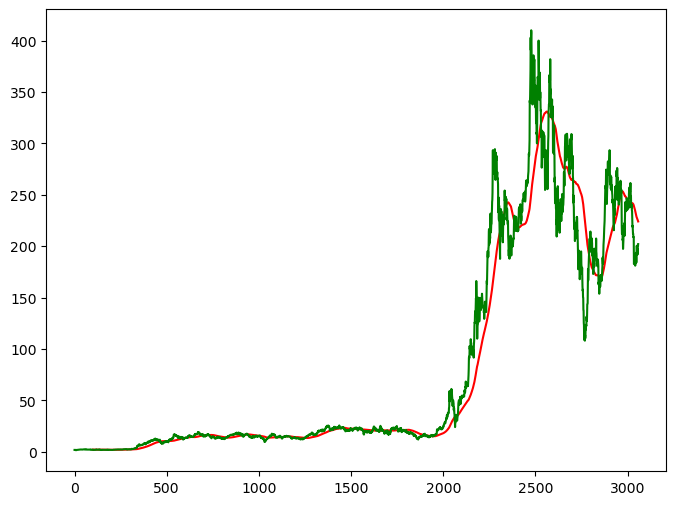

In [14]:
plt.figure(figsize=(8,6))
                    
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

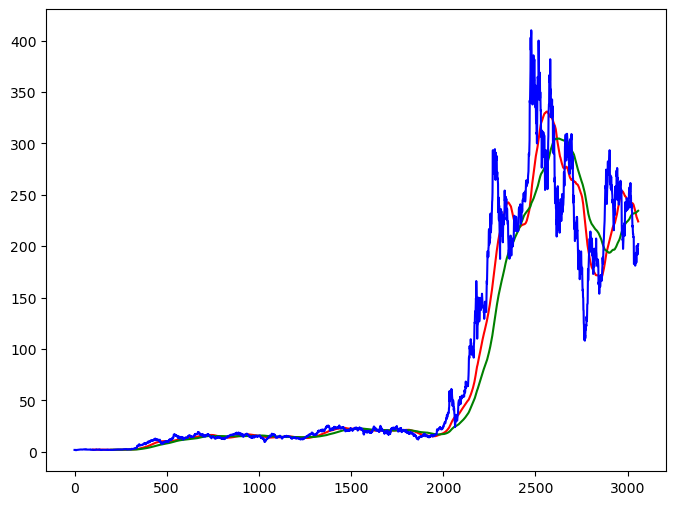

In [16]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'g')
plt.plot(data.Close,'b')
plt.show()

In [17]:
data.dropna(inplace=True)

In [67]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [19]:
data_train.shape[0]

2446

In [20]:
data_test.shape[0]

612

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [22]:
data_train_scale = scaler.fit_transform(data_train)

In [68]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [24]:
x, y = np.array(x), np.array(y)

In [25]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [55]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [65]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [69]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

ValueError: Failed to find data adapter that can handle input: (<class 'list'> containing values of types {"<class 'numpy.ndarray'>"}), (<class 'list'> containing values of types {"<class 'numpy.float64'>"})

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [30]:
pas_100_days = data_train.tail(100)

In [31]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [32]:
data_test_scale  =  scaler.fit_transform(data_test)

In [33]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [ ]:
y_predict = model.predict(x)

In [ ]:
scale =1/scaler.scale_

In [ ]:
y_predict = y_predict*scale

In [ ]:
y = y*scale

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'brown', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
model.save('Stock Predictions Model.keras')

In [ ]:
plt.plot('ADJ close')